### Build a Resume Scanner to check how well your Resume matches a Job Description

In [ ]:
# pip install docx2txt
# pip install PyPDF2
# pip install pdfreader
# pip install pdfminer

### Import Libraries

In [1]:
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

# Docx resume
import docx2txt

#Wordcloud
import re
import operator
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
set(stopwords.words('english'))
from wordcloud import WordCloud
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### Read PDF Resume

In [2]:
def read_pdf_resume(pdf_doc):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)
    
    with open(pdf_doc, 'rb') as fh:
        for page in PDFPage.get_pages(fh, 
                                      caching=True,
                                      check_extractable=True):
            page_interpreter.process_page(page)
            
        text = fake_file_handle.getvalue()
    
    # close open handles
    converter.close()
    fake_file_handle.close()
    
    if text:
        return text

### Read Word Resume

In [3]:
def read_word_resume(word_doc):
    #resume = docx2txt.process(word_doc)
    #text = ''.join(resume)
    resume = docx2txt.process(word_doc)
    resume = str(resume)
    #print(resume)
    text =  ''.join(resume)
    text = text.replace("\n", "")
    
    if text:
        return text
    

### Word Cloud

In [4]:
def clean_job_decsription(jd):
    ''' a function to create a word cloud based on the input text parameter'''
    ## Clean the Text
    # Lower
    clean_jd = jd.lower()
    # remove punctuation
    clean_jd = re.sub(r'[^\w\s]', '', clean_jd)
    # remove trailing spaces
    clean_jd = clean_jd.strip()
    # remove numbers
    clean_jd = re.sub('[0-9]+', '', clean_jd)
    # tokenize 
    clean_jd = word_tokenize(clean_jd)
    # remove stop words
    stop = stopwords.words('english')
    #stop.extend(["AT_USER","URL","rt","corona","coronavirus","covid","amp","new","th","along","icai","would","today","asks"])
    clean_jd = [w for w in clean_jd if not w in stop] 
    
    return(clean_jd)

In [5]:
def create_word_cloud(jd):
    corpus = jd
    fdist = FreqDist(corpus)
    #print(fdist.most_common(100))
    words = ' '.join(corpus)
    words = words.split()

    # create a empty dictionary
    data = dict()
    #  Get frequency for each words where word is the key and the count is the value
    for word in (words):
        word = word.lower()
        data[word] = data.get(word, 0) + 1
    # Sort the dictionary in reverse order to print first the most used terms    
    dict(sorted(data.items(), key=operator.itemgetter(1),reverse=True))
    word_cloud = WordCloud(width = 800, height = 800, background_color ='white',max_words = 500)
    word_cloud.generate_from_frequencies(data)
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 8), edgecolor = 'k') 
    plt.imshow(word_cloud,interpolation = 'bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

### Get JD and Resume Match Score

In [6]:
def get_resume_score(text):
    cv = CountVectorizer(stop_words='english')
    count_matrix = cv.fit_transform(text)
    #Print the similarity scores
    print("\nSimilarity Scores:")
    #print(cosine_similarity(count_matrix))
    #get the match percentage
    matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
    matchPercentage = round(matchPercentage, 2) # round to two decimal
    print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

Enter File Extension: pdf

Enter the Job Description: What you'll do: The role involves partnering very closely with multiple PMs, Engineers, Test Managers and Business Partner to elevate the site experience for the verticals on Walmart. Analyze click stream data to understand how customers are interacting with the site. Uncover user pain points and help in building inspirational experiences. Provide and supports the implementation of product solutions Provide data driven insights and deliver recommendations that address opportunities for product improvements Provide analytical support to Product Managers Ensure accuracy of data capture strategy A/B Test: Test variations on messaging or features. Display dashboards: Visualize data with templated or custom reports. Create effective reporting and dashboards. Measure: Measure engagement by feature A self-starter: Can drive projects with minimal guidance Strong communicator: You effectively synthesize, visualize, and communicate your ideas

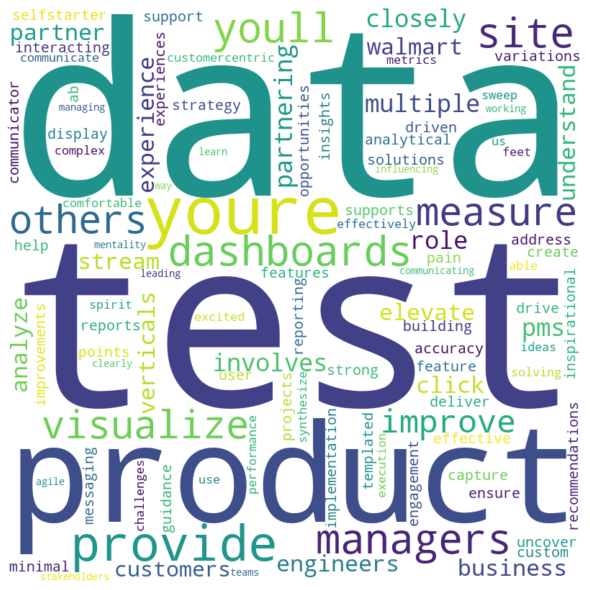


Similarity Scores:
Your resume matches about 26.82% of the job description.


In [7]:
if __name__ == '__main__':
    extn = input("Enter File Extension: ")
    #print(extn)
    if extn == "pdf":
        resume = read_pdf_resume('Resume_OindrilaSen.pdf')
    else:
        resume = read_word_resume('test_resume.docx')
    
    job_description = input("\nEnter the Job Description: ")

    ## Get a Keywords Cloud
    clean_jd = clean_job_decsription(job_description)
    create_word_cloud(clean_jd)
    
    text = [resume, job_description]
    
    ## Get a Match
    get_resume_score(text)

In [ ]:
##'Develop data processing frameworks (ETL/ELT) for Enterprise Data Warehouse. Build large-scale batch and real-time data pipelines using the cloud data technologies, such as Snowflake, Python, and Apache Airflow  Serve as a resource for data technologies implementations partnering with other functional teams and collaborate with data owners, business owners, and leaders. Supports the design and development of framework based data integration and interoperability across multiple Splunk Business applications. Advanced knowledge of physical database design and data structures. Expert knowledge of one or more database management systems such as AWS Redshift, Snowflake. Expert level skills in SQL, Python based data integration, data modeling and data architecture   Must Haves:  12 years of experience as a Data Warehouse Developer, Data Engineer. 5+ years of experience driving adoption and building automation of data technology services and tools. 5+ years of hands-on experience with Python API based ELT automation framework, or interface design, development and maintenance. Large scale design, implementation and operations of Cloud data storage technologies such as AWS Redshift and Snowflake. 5+ years technical knowledge of programming scripting and data science languages such as Python, R, SQL, etc. Experience in building data models, including conceptual, logical, and physical for Enterprise Relational, and Dimensional Databases'